In [10]:
from GA_Clustering import GACluster
from matplotlib import pyplot as plt
import random
import numpy as np

In [2]:
points = [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 

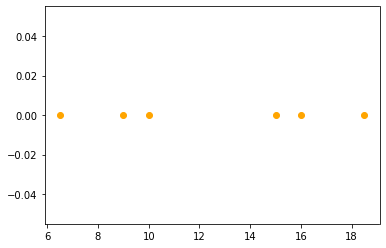

In [3]:
# Iscrtavanje tacaka
xs, ys = list(map(lambda p: p[0], points)), list(map(lambda p: p[1], points))
plt.scatter(xs, ys, c='orange')
plt.show()

In [4]:
# Testiranje
brojKlastera = 2
model  = GACluster(brojKlastera, max_iter=10, population_size=19, mutation_rate=0.05)
model.fit(points)
print(f"Labele: {model.labels()}")
print(f"Centroidi: {model.cluster_centers()}")
print("SSE: {}".format(model.sse()))

Pocetni centroidi: [[18.5, 0], [15, 0]]
Labels : [1, 1, 1, 1, 1, 0]
0 [[18.5, 0]] 1
Code [18.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0]] 5
Code [11.3  0. ]
Pocetni centroidi: [[16, 0], [9, 0]]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [[9, 0], [6.5, 0]]
Labels : [1, 0, 0, 0, 0, 0]
0 [[9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 5
Code [13.7  0. ]
1 [[6.5, 0]] 1
Code [6.5 0. ]
Pocetni centroidi: [[6.5, 0], [10, 0]]
Labels : [0, 1, 1, 1, 1, 1]
0 [[6.5, 0]] 1
Code [6.5 0. ]
1 [[9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 5
Code [13.7  0. ]
Pocetni centroidi: [[10, 0], [16, 0]]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni centroidi: [[10, 0], [15, 0]]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni cent

C:\Users\Windows\Desktop\riProjekat\GA-clustering\ga.py:24: RuntimeWarning: invalid value encountered in double_scalars
  code[i] =  np.sum(clusters[i], axis=0)  / len(clusters[i])



Labels : [1, 1, 1, 1, 1, 0]
0 [[18.5, 0]] 1
Code [18.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0]] 5
Code [11.3  0. ]
Pocetni centroidi: [array([7.75, 0.  ]), array([11.3,  0. ])]
Labels : [0, 0, 1, 1, 1, 1]
0 [[6.5, 0], [9, 0]] 2
Code [7.75 0.  ]
1 [[10, 0], [15, 0], [16, 0], [18.5, 0]] 4
Code [14.875  0.   ]
Pocetni centroidi: [array([13.,  0.]), array([10.,  0.])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([7.75, 0.  ]), array([14.875,  0.   ])]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni centroidi: [array([8.5, 0. ]), array([8.5, 0. ])]
Labels : [0, 0, 0, 0, 0, 0]
0 [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 6
Code [12.5  0. ]
1 [] 0
Code nan


------PRAZAN KLASTER--------:   1
0 [[6.5, 0], [9, 0], [10, 0], [16, 0], [18.5, 0]] 5
Code [12.  0.]
1 [[15, 0]] 1
Code

Pocetni centroidi: [array([8.5, 0. ]), array([16.5,  0. ])]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni centroidi: [array([8.5, 0. ]), array([16.5,  0. ])]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni centroidi: [array([6.5, 0. ]), array([13.7,  0. ])]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni centroidi: [array([17.25,  0.  ]), array([10.125,  0.   ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([8.5, 0. ]), array([16.5,  0. ])]
Labels : [0, 0, 0, 1, 1, 1]
0 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
1 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
Pocetni centroidi: [array([8.5, 0. ]), array([16.5,  0. ])]
La

Pocetni centroidi: [array([18.5,  0. ]), array([11.3,  0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([18.5,  0. ]), array([11.3,  0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([16.5,  0. ]), array([16.5,  0. ])]
Labels : [0, 0, 0, 0, 0, 0]
0 [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 6
Code [12.5  0. ]
1 [] 0
Code nan


------PRAZAN KLASTER--------:   1
0 [[6.5, 0], [9, 0], [10, 0], [16, 0], [18.5, 0]] 5
Code [12.  0.]
1 [[15, 0]] 1
Code [15.  0.]
Pocetni centroidi: [array([8.5, 0. ]), array([8.5, 0. ])]
Labels : [0, 0, 0, 0, 0, 0]
0 [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 6
Code [12.5  0. ]
1 [] 0
Code nan


------PRAZAN KLASTER--------:   1
0 [[6.5, 0], [9, 0], [15, 0], [16, 0], [18.5, 0]] 5
Code [13.  0.]
1 [[10, 0]] 1
Code [10.  

Pocetni centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
Labels : [1, 1, 1, 0, 0, 0]
0 [[15, 0], [16, 0], [18.5, 0]] 3
Code [16.5  0. ]
1 [[6.5, 0], [9, 0], [10, 0]] 3
Code [8.5 0. ]
Pocetni centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
Labels : [

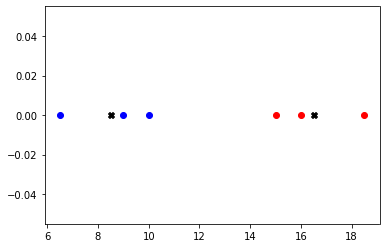

In [7]:
#Crtanje doijenog rezultata
colors  =  {0:'r', 1:'b'}
labels  = model.labels_
for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c=colors[labels[i]])

#Crtanje centroida
centres = model.cluster_centers_
for i in range(len(centres)):
    plt.scatter(centres[i][0], centres[i][1], c='black', marker='X')

In [8]:
model.labels_

[1, 1, 1, 0, 0, 0]

## Testiranje na vecem skupu

In [27]:
def generate_point(mean_x, mean_y, deviation_x, deviation_y):
    return random.gauss(mean_x, deviation_x), random.gauss(mean_y, deviation_y)

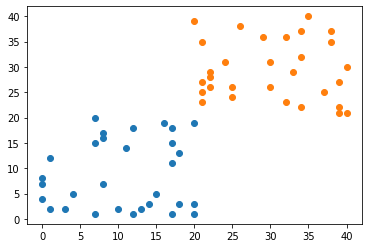

In [158]:
x = [random.randint(0,20)  for i in range(30)]
y = [random.randint(0,20)  for i in range(30)]
xs1 = list(zip(x, y))
plt.scatter(x,   y )

x = [random.randint(20,40)  for i in range(30)]
y = [random.randint(20,40)  for i in range(30)]
xs2 = list(zip(x, y))
plt.scatter(x,   y )
xs = xs1 + xs2

In [160]:
points2 = xs

In [175]:
model_2 = GACluster(n_clusters=2, max_iter=10, population_size=10, mutation_rate=0.2, elitism_size=4)

In [176]:
model_2.fit(points2)

Pocetni centroidi: [(17, 11), (34, 22)]
Labels : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0 [(8, 17), (18, 13), (18, 3), (3, 2), (20, 19), (11, 14), (13, 2), (15, 5), (4, 5), (0, 8), (17, 15), (1, 12), (0, 4), (20, 1), (8, 16), (16, 19), (17, 18), (0, 7), (14, 3), (10, 2), (17, 1), (12, 18), (7, 1), (20, 3), (17, 11), (7, 20), (7, 15), (8, 7), (1, 2), (12, 1), (21, 23)] 31
Code [11.03225806  9.25806452]
1 [(30, 26), (39, 27), (25, 26), (25, 24), (29, 36), (20, 39), (32, 36), (21, 25), (38, 35), (35, 40), (39, 21), (40, 21), (37, 25), (22, 26), (34, 22), (22, 28), (21, 27), (40, 30), (22, 29), (32, 23), (34, 37), (26, 38), (38, 37), (24, 31), (34, 32), (39, 22), (30, 31), (33, 29), (21, 35)] 29
Code [30.4137931 29.5862069]
Pocetni centroidi: [(11, 14), (7, 15)]
Labels : [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1

Labels : [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 [(20, 19), (30, 26), (39, 27), (25, 26), (25, 24), (29, 36), (20, 39), (32, 36), (21, 25), (38, 35), (35, 40), (39, 21), (40, 21), (37, 25), (22, 26), (34, 22), (22, 28), (21, 27), (40, 30), (21, 23), (22, 29), (32, 23), (34, 37), (26, 38), (38, 37), (24, 31), (34, 32), (39, 22), (30, 31), (33, 29), (21, 35)] 31
Code [29.77419355 29.03225806]
1 [(8, 17), (18, 13), (18, 3), (3, 2), (11, 14), (13, 2), (15, 5), (4, 5), (0, 8), (17, 15), (1, 12), (0, 4), (20, 1), (8, 16), (16, 19), (17, 18), (0, 7), (14, 3), (10, 2), (17, 1), (12, 18), (7, 1), (20, 3), (17, 11), (7, 20), (7, 15), (8, 7), (1, 2), (12, 1)] 29
Code [10.37931034  8.44827586]
Pocetni centroidi: [array([24.18367347, 21.16326531]), array([3.54545455, 9.81818182])]
Labels : [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

Pocetni centroidi: [array([29.77419355, 29.03225806]), array([10.37931034,  8.44827586])]
Labels : [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 [(20, 19), (30, 26), (39, 27), (25, 26), (25, 24), (29, 36), (20, 39), (32, 36), (21, 25), (38, 35), (35, 40), (39, 21), (40, 21), (37, 25), (22, 26), (34, 22), (22, 28), (21, 27), (40, 30), (21, 23), (22, 29), (32, 23), (34, 37), (26, 38), (38, 37), (24, 31), (34, 32), (39, 22), (30, 31), (33, 29), (21, 35)] 31
Code [29.77419355 29.03225806]
1 [(8, 17), (18, 13), (18, 3), (3, 2), (11, 14), (13, 2), (15, 5), (4, 5), (0, 8), (17, 15), (1, 12), (0, 4), (20, 1), (8, 16), (16, 19), (17, 18), (0, 7), (14, 3), (10, 2), (17, 1), (12, 18), (7, 1), (20, 3), (17, 11), (7, 20), (7, 15), (8, 7), (1, 2), (12, 1)] 29
Code [10.37931034  8.44827586]
Pocetni centroidi: [array([26.42857143, 31.42857143]), array([17.15384615, 1

Pocetni centroidi: [array([29.77419355, 29.03225806]), array([10.37931034,  8.44827586])]
Labels : [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 [(20, 19), (30, 26), (39, 27), (25, 26), (25, 24), (29, 36), (20, 39), (32, 36), (21, 25), (38, 35), (35, 40), (39, 21), (40, 21), (37, 25), (22, 26), (34, 22), (22, 28), (21, 27), (40, 30), (21, 23), (22, 29), (32, 23), (34, 37), (26, 38), (38, 37), (24, 31), (34, 32), (39, 22), (30, 31), (33, 29), (21, 35)] 31
Code [29.77419355 29.03225806]
1 [(8, 17), (18, 13), (18, 3), (3, 2), (11, 14), (13, 2), (15, 5), (4, 5), (0, 8), (17, 15), (1, 12), (0, 4), (20, 1), (8, 16), (16, 19), (17, 18), (0, 7), (14, 3), (10, 2), (17, 1), (12, 18), (7, 1), (20, 3), (17, 11), (7, 20), (7, 15), (8, 7), (1, 2), (12, 1)] 29
Code [10.37931034  8.44827586]
Pocetni centroidi: [array([29.77419355, 29.03225806]), array([10.37931034,  

Labels : [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 [(20, 19), (30, 26), (39, 27), (25, 26), (25, 24), (29, 36), (20, 39), (32, 36), (21, 25), (38, 35), (35, 40), (39, 21), (40, 21), (37, 25), (22, 26), (34, 22), (22, 28), (21, 27), (40, 30), (21, 23), (22, 29), (32, 23), (34, 37), (26, 38), (38, 37), (24, 31), (34, 32), (39, 22), (30, 31), (33, 29), (21, 35)] 31
Code [29.77419355 29.03225806]
1 [(8, 17), (18, 13), (18, 3), (3, 2), (11, 14), (13, 2), (15, 5), (4, 5), (0, 8), (17, 15), (1, 12), (0, 4), (20, 1), (8, 16), (16, 19), (17, 18), (0, 7), (14, 3), (10, 2), (17, 1), (12, 18), (7, 1), (20, 3), (17, 11), (7, 20), (7, 15), (8, 7), (1, 2), (12, 1)] 29
Code [10.37931034  8.44827586]
Pocetni centroidi: [array([29.77419355, 29.03225806]), array([10.37931034,  8.44827586])]
Labels : [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

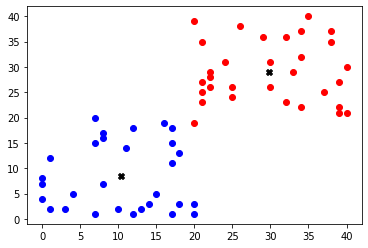

In [178]:
#Crtanje doijenog rezultata
colors  =  {0:'r', 1:'b'}
labels = model_2.labels_
for i in range(len(points2)):
    plt.scatter(points2[i][0], points2[i][1], c=colors[labels[i]])

# Crtanje centroida
centres = model_2.cluster_centers_
for i in range(len(centres)):
    plt.scatter(centres[i][0], centres[i][1], c='black', marker='X')

In [193]:
## SSE 
model_2.sse_

528.0894761864831

## K-Means

In [179]:
from sklearn.cluster import KMeans

In [180]:
model_k_means = KMeans(n_clusters=2)

In [181]:
model_k_means.fit(points2)

KMeans(n_clusters=2)

In [183]:
labels = model_k_means.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [184]:
cenntres = model_k_means.cluster_centers_
cenntres

array([[30.1       , 29.36666667],
       [10.7       ,  8.8       ]])

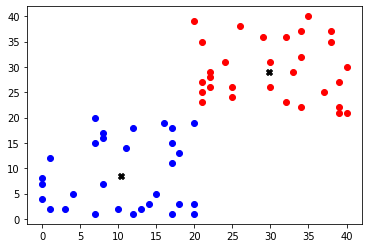

In [185]:
#Crtanje doijenog rezultata
colors  =  {0:'r', 1:'b'}
for i in range(len(points2)):
    plt.scatter(points2[i][0], points2[i][1], c=colors[labels[i]])

# Crtanje centroida
for i in range(len(centres)):
    plt.scatter(centres[i][0], centres[i][1], c='black', marker='X')

In [191]:
## SSE
model_k_means.inertia_

5070.766666666668